In [1]:
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import xarray as xr
import pandas as pd
import scipy
from datetime import datetime, timedelta
import time
import seaborn
import matplotlib.dates as mdates
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
import math
import netCDF4 as nc
import requests

# Import K's code for calculating the coefficients of the carb system
import calc_coeffs as co2
import H_poly as hpoly
import H_poly2 as hpoly2
from importlib import reload
import warnings
# warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

In [2]:
import carbon as carbon
import numpy.ma as ma

In [3]:
lat = np.loadtxt('/Users/akbaskind/Documents/Python Scripts/OCG577/data/latitude.txt')
lon = np.loadtxt('/Users/akbaskind/Documents/Python Scripts/OCG577/data/longitude.txt')
DIC = np.loadtxt('/Users/akbaskind/Documents/Python Scripts/OCG577/data/SurfDIC.txt')
TA = np.loadtxt('/Users/akbaskind/Documents/Python Scripts/OCG577/data/SurfAlk.txt')
T = np.loadtxt('/Users/akbaskind/Documents/Python Scripts/OCG577/data/SurfT.txt')
S = np.loadtxt('/Users/akbaskind/Documents/Python Scripts/OCG577/data/SurfS.txt')

In [4]:
dic = ma.masked_invalid(DIC)
ta = ma.masked_invalid(TA)
s = ma.masked_invalid(S)
t = ma.masked_invalid(T)

In [5]:
results = carbon.solver(TA = ta, DIC = dic, temperature = t, salinity = s)

/Users/akbaskind/Documents/Python Scripts/OCG577/carbon.py:582: UserWarning: Warning: converting a masked element to nan.
  pCO2[i,j] = (DIC[i,j] / k0[i,j]) * ((H[i,j]**2)/(H[i,j]**2 + k1[i,j] * H[i,j] + k1[i,j] * k2[i,j]))
/Users/akbaskind/Documents/Python Scripts/OCG577/carbon.py:586: UserWarning: Warning: converting a masked element to nan.
  co2star[i,j] = k0[i,j] * pCO2[i,j]
/Users/akbaskind/Documents/Python Scripts/OCG577/carbon.py:589: UserWarning: Warning: converting a masked element to nan.
  HCO3[i,j] = (k1[i,j] * co2star[i,j])/H[i,j]
/Users/akbaskind/Documents/Python Scripts/OCG577/carbon.py:592: UserWarning: Warning: converting a masked element to nan.
  CO3[i,j] = (k2[i,j] * HCO3[i,j])/H[i,j]
/Users/akbaskind/Documents/Python Scripts/OCG577/carbon.py:582: RuntimeWarning: divide by zero encountered in true_divide
  pCO2[i,j] = (DIC[i,j] / k0[i,j]) * ((H[i,j]**2)/(H[i,j]**2 + k1[i,j] * H[i,j] + k1[i,j] * k2[i,j]))


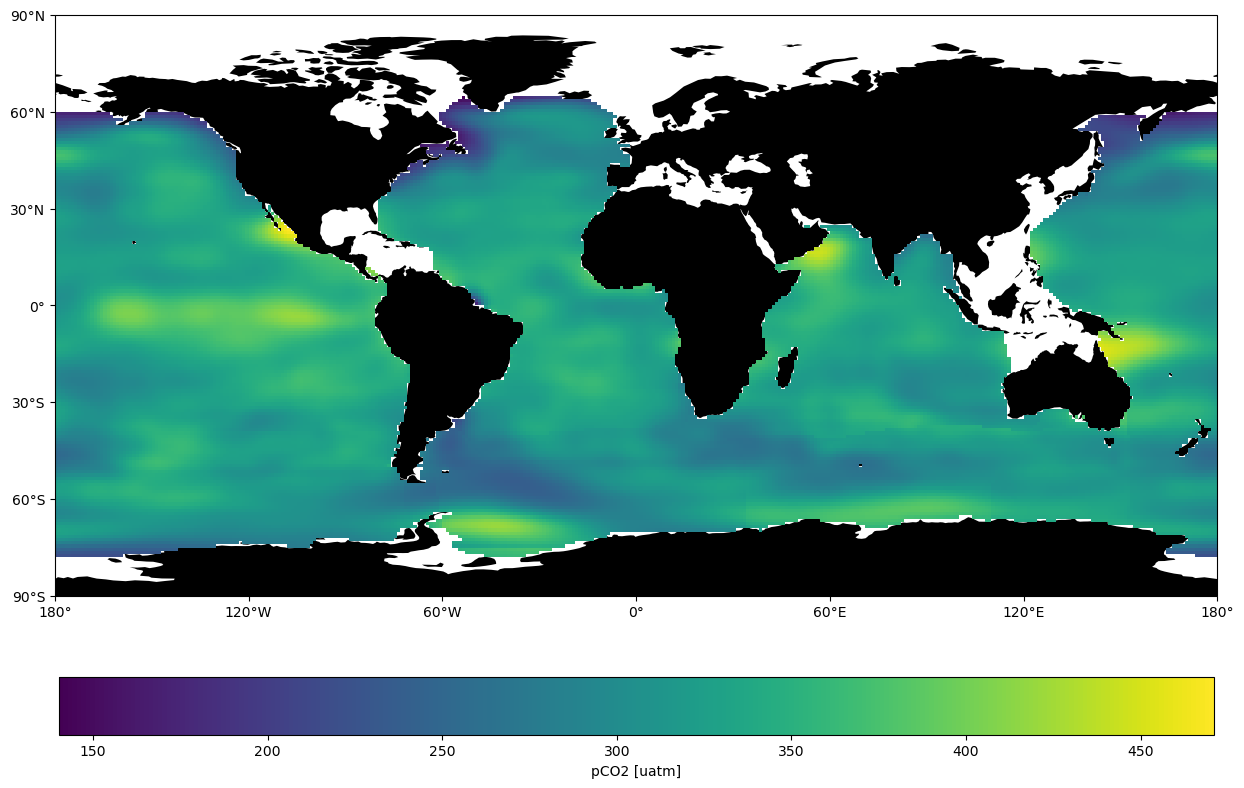

In [12]:
fig, ax = plt.subplots(figsize = [15,15],subplot_kw={'projection':ccrs.PlateCarree()})
import cartopy as cart

C = results['pCO2']
x,y = np.meshgrid(lon, lat)
im = ax.pcolormesh(lon, lat, C)
cbar = plt.colorbar(im, ax = ax, orientation = 'horizontal', fraction = 0.05, pad = 0.07)
cbar.set_label('pCO2 [uatm]')
# ax.set_title('[H+] from GFDL-ESM4', fontsize = 24)
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
# ax.coastlines()
ax.add_feature(cart.feature.LAND, facecolor='black')

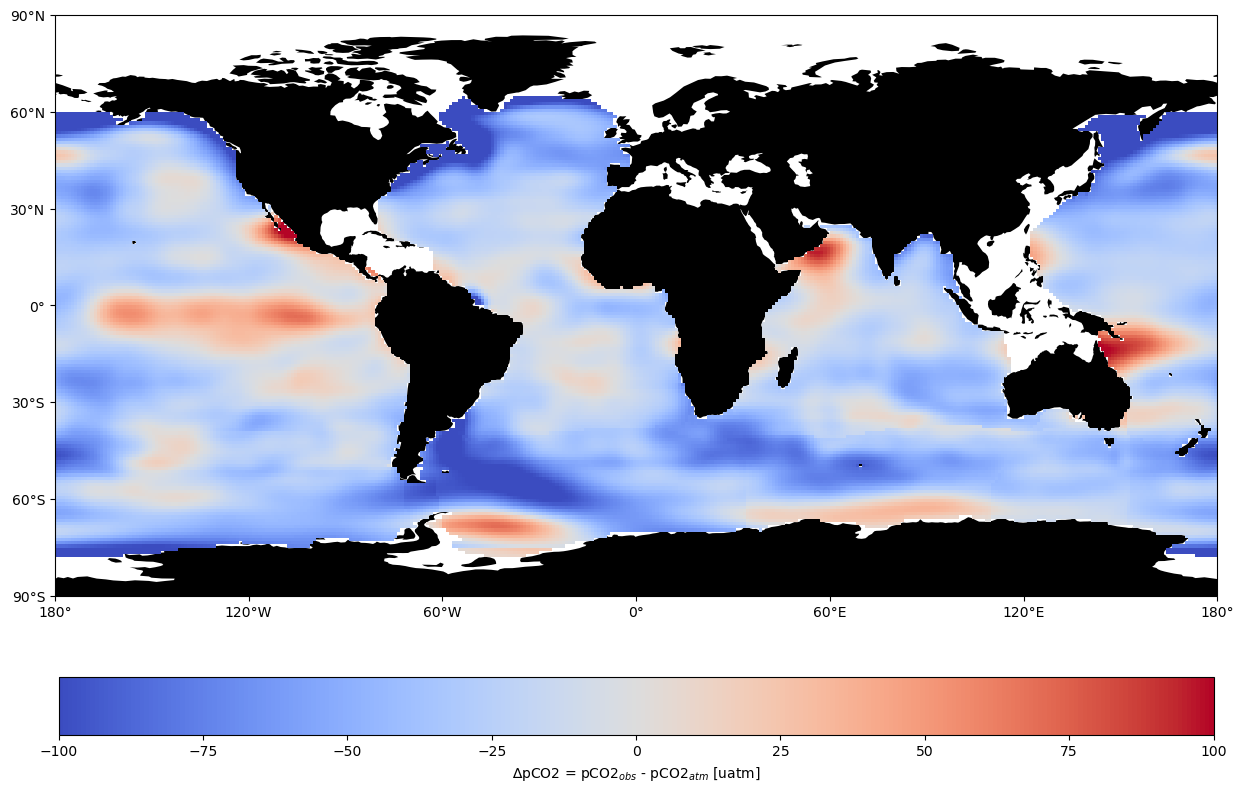

In [11]:
fig, ax = plt.subplots(figsize = [15,15],subplot_kw={'projection':ccrs.PlateCarree()})
import cartopy as cart

C = results['pCO2'] - 350
x,y = np.meshgrid(lon, lat)
im = ax.pcolormesh(lon, lat, C, cmap = 'coolwarm', vmin = -100, vmax = 100)
cbar = plt.colorbar(im, ax = ax, orientation = 'horizontal', fraction = 0.05, pad = 0.07)
cbar.set_label('∆pCO2 = pCO2$_{obs}$ - pCO2$_{atm}$ [uatm]')
# ax.set_title('[H+] from GFDL-ESM4', fontsize = 24)
ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)
# ax.coastlines()
ax.add_feature(cart.feature.LAND, facecolor='black')

# Discussion
## Brief observations on heat flux
* Positive values indicate the ocean is taking up heat. In other words, positive values indicate water colder than the ambient temperature.
* Heat uptake occurs, often, at upwelling zones, where cool deep water reaches the surface.
    * Equatorial upwelling
    * coastal upwelling, often along eastern boundaries
    * Southern Ocean wind-driven upwelling, generally around the polar front which is near or equatorward of 60°S
* Heat uptake is strongest at low latitudes, where zonal temperatures are higher largely due to stronger SW flux.
## Southern Ocean
* pCO2 is super saturated in sites of deep water formation, particularly in the Weddell Gyre. This is not represented in the heat flux map, but is generally thought to be a site of heat release to the atmosphere. The excess in pCO2 could be indicative of the SO in this location being efficient at dissolving CO2 such that it manifests as an excess?
* The region of heat release and upwelling circa the Polar Front only shows pCO2 supersaturation in the Pacific sector. This portion of the SO has particularly strong upwelling due to the Kerguelan Plateau and previous research (including my thesis research) confirm the Pacific sector of the SO outgasses the most CO2. Clearly, solubility has a large effect here. 
## Other upwelling regimes
* Cold water saturated in pCO2 upwells along the equator and near coasts. Since the water from the deep is cold, CO2 is particularly soluble, so once at the surface it becomes supersaturated and tends to outgas.
## Reasons for disagreement between heat flux and ∆pCO2
* Biological pump
* water masses--younger water masses will have less pCO2 overall so even if solubility is lost as heat is released to the atmosphere, the water may be too young to be saturated in pCO2
## Western boundary currents (e.g. Kuroshio and Gulf Stream)
* These sites carry warm water poleward. The warmth makes CO2 less soluble but induces heat release. CO2 has lower solubility in such scenarios so ∆pCO2 is negative.

In [15]:
np.log(2)

0.6931471805599453

In [20]:
np.power(2,3)

8